In [188]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [189]:
data = pd.read_csv('test_1000.csv')

In [190]:
data_q = data.drop(['id','qid1','qid2'], axis=1)

In [191]:
#length based features
data_q['len_q1'] = data_q.question1.apply(lambda x: len(str(x)))
data_q['len_q2'] = data_q.question2.apply(lambda x: len(str(x)))
# difference in lengths of two questions
data_q['diff_len'] = abs(data_q.len_q1 - data_q.len_q2)

# character length based features
data_q['len_char_q1'] = data_q.question1.apply(lambda x: 
len(''.join(set(str(x).replace(' ', '')))))
data_q['len_char_q2'] = data_q.question2.apply(lambda x: 
len(''.join(set(str(x).replace(' ', '')))))

# word length based features
data_q['len_word_q1'] = data_q.question1.apply(lambda x: 
len(str(x).split()))
data_q['len_word_q2'] = data_q.question2.apply(lambda x: 
len(str(x).split()))
data_q['diff_wlen'] = abs(data_q.len_word_q1 - data_q.len_word_q2)

# common words in the two questions
data_q['common_words'] = data_q.apply(lambda x: 
len(set(str(x['question1'])
.lower().split())
.intersection(set(str(x['question2'])
.lower().split()))), axis=1)

#ratio of number of common words to the mean of total words in two questions
data_q["ratio_common"] = data_q["common_words"]*2/(data_q["len_word_q1"]+data_q["len_word_q1"])
data_q["ratio_common"] = data_q["ratio_common"].astype('float64')
pd.options.display.float_format = '{:.2f}'.format

In [192]:
# creating feature set for basic features
fs_1 = data_q[['diff_len','diff_wlen','ratio_common']]

In [193]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
from fuzzywuzzy import fuzz

In [194]:
data_q['fuzz_qratio'] = data_q.apply(lambda x: fuzz.QRatio(
    str(x['question1']), str(x['question2'])), axis=1)
data_q['fuzz_WRatio'] = data_q.apply(lambda x: fuzz.WRatio(
str(x['question1']), str(x['question2'])), axis=1)

data_q['fuzz_partial_ratio'] = data_q.apply(lambda x: 
fuzz.partial_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

data_q['fuzz_partial_token_set_ratio'] = data_q.apply(lambda x:
fuzz.partial_token_set_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

data_q['fuzz_partial_token_sort_ratio'] = data_q.apply(lambda x: 
fuzz.partial_token_sort_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

data_q['fuzz_token_set_ratio'] = data_q.apply(lambda x: 
fuzz.token_set_ratio(str(x['question1']), 
str(x['question2'])), axis=1)
data_q['fuzz_token_sort_ratio'] = data.apply(lambda x: 
                   fuzz.token_sort_ratio(str(x['question1']), 
                   str(x['question2'])), axis=1)

In [195]:
# Creating second feature set from fuzzy features
fs_2 = data_q[['fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio', 
       'fuzz_partial_token_sort_ratio','fuzz_token_set_ratio', 'fuzz_token_sort_ratio']]

In [196]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
from copy import deepcopy
tfv_q1 = TfidfVectorizer(min_df=3, 
max_features=None, 
strip_accents='unicode', 
analyzer='word', 
token_pattern=r'w{1,}',
ngram_range=(1, 2), 
use_idf=1, 
smooth_idf=1, 
sublinear_tf=1,
stop_words='english')

tfv_q2 = deepcopy(tfv_q1)

In [198]:
q1_tfidf = tfv_q1.fit_transform(data_q.question1.fillna(""))
q2_tfidf = tfv_q2.fit_transform(data_q.question2.fillna(""))

In [199]:
from sklearn.decomposition import TruncatedSVD
svd_q1 = TruncatedSVD(n_components=1)
svd_q2 = TruncatedSVD(n_components=1)

In [200]:
question1_vectors = svd_q1.fit_transform(q1_tfidf)
question2_vectors = svd_q2.fit_transform(q2_tfidf)

In [201]:
# obtain features by stacking the matrices together
fs3_3 = np.hstack((question1_vectors, question2_vectors))

In [202]:
dfs3_3 = pd.DataFrame(fs3_3, columns = ['q1_vector','q2_vector'])

In [203]:
from scipy.spatial.distance import cosine, cityblock,jaccard, canberra, euclidean, minkowski, braycurtis

In [204]:
data_q['cosine_distance'] = [cosine(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
data_q['jaccard_distance'] = [jaccard(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
data_q['cityblock_distance'] = [cityblock(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
data_q['jaccard_distance'] = [jaccard(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
data_q['canberra_distance'] = [canberra(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
data_q['euclidean_distance'] = [jaccard(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
data_q['minkowski_distance'] = [minkowski(x,y) 
for (x,y) in zip(question1_vectors, question2_vectors)]
#data_q['braycurtis_distance'] = [braycurtis(x,y) 
#for (x,y) in zip(question1_vectors, question2_vectors)]

In [205]:
#fs4 = data_q[['cosine_distance', 'cityblock_distance', 
#         'jaccard_distance', 'canberra_distance', 
#         'euclidean_distance', 'minkowski_distance']]

In [206]:
fs4 = data_q[[ 'cityblock_distance', 'canberra_distance', 'minkowski_distance']]

<AxesSubplot:xlabel='cityblock_distance', ylabel='is_duplicate'>

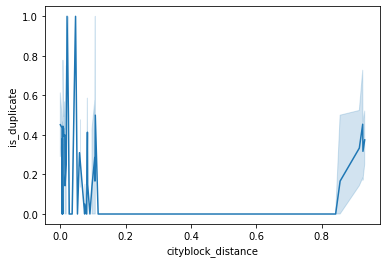

In [207]:
sns.lineplot(data=data_q, x="cityblock_distance", y="is_duplicate")

In [208]:
!pip install -U scikit-learn

In [209]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [210]:
X= pd.concat([fs_1,fs_2,fs4], axis=1)
X=X.astype('float64')
Y=data_q["is_duplicate"]
X

,diff_len,diff_wlen,ratio_common,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,cityblock_distance,canberra_distance,minkowski_distance
0,9.00,2.00,0.71,93.00,95.00,98.00,89.00,100.00,93.00,0.01,0.00,0.01
1,37.00,5.00,0.50,66.00,86.00,73.00,75.00,86.00,63.00,0.01,0.00,0.01
2,14.00,4.00,0.29,54.00,63.00,53.00,71.00,66.00,66.00,0.01,0.01,0.01
3,15.00,2.00,0.00,35.00,35.00,30.00,38.00,36.00,36.00,0.01,0.01,0.01
4,37.00,6.00,0.15,46.00,86.00,54.00,63.00,67.00,47.00,0.06,0.03,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
995,35.00,6.00,0.13,46.00,46.00,44.00,47.00,46.00,43.00,0.01,0.01,0.01
996,28.00,5.00,0.36,45.00,59.00,47.00,64.00,62.00,59.00,0.01,0.00,0.01
997,22.00,1.00,0.00,36.00,40.00,40.00,44.00,42.00,42.00,0.93,1.00,0.93
998,8.00,0.00,0.54,55.00,68.00,55.00,71.00,72.00,70.00,0.08,0.05,0.08


In [211]:
#X=X.astype('float64')
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [213]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

In [214]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [215]:
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [216]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
BestLR=logreg_cv.best_estimator_
print("accuracy :",BestLR.score(X_test,Y_test))

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6542857142857142
accuracy : 0.67


In [217]:
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC

In [218]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv=GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.6585714285714286


In [219]:
BestLR=knn_cv.best_estimator_
print("accuracy :",BestLR.score(X_test,Y_test))

accuracy : 0.6866666666666666


In [90]:
import numpy as np
import pandas as pd
from sklearn import tree


In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()

In [93]:
tree_cv=GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [94]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
BestLR=tree_cv.best_estimator_
print("accuracy :",BestLR.score(X_test,Y_test))

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.6842857142857144
accuracy : 0.67


In [95]:
from sklearn import svm
svm_cv = svm.SVC(kernel='linear')
#'poly','rbf', 'sigmoid'

In [96]:
svm_cv.fit(X_train,Y_train)
from sklearn import metrics
yhat = svm_cv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, yhat))

Accuracy: 0.69


In [97]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [98]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [99]:
# performing predictions on the test dataset
y_hat = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_hat))


ACCURACY OF THE MODEL:  0.6733333333333333
